## Assignment 5 - Deadline: Nov 9, 2025, Sun 11pm

#### DSAI 510 Fall 2025

Complete the assignment below and upload <span style="color:red">both the .ipynb file and its pdf</span> to https://moodle.boun.edu.tr by the deadline given above. The submission page on Moodle will close automatically after this date and time.


To make a pdf, this may work: Hit CMD+P or CTRL+P, and save it as PDF. You may also use other options from the File menu.

In [1]:
# Run this cell first

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Set the display option to show all rows scrolling with a slider
# pd.set_option('display.max_rows', None)
# To disable this, run the line below:
# pd.reset_option('display.max_rows')

## Note: 
In the problems below, if they ask "show the number of records that are nonzero", 
the answer is a number; so you don't need to show the records themselves.
But if it asks, "show the records with NaN", it wants you to print those records (rows)
containing NAN and other entries, not asking how many such records there are. So be careful about what you're asked.

# Total: 140 pts.

## Problem 1 (10 pts)

Create the dataframe by running the cell below

In [2]:
data = {'A': [1, 2, 3, 4, 5], 'B': [2.1, 4.2, 5.6, 8, 11]}
df = pd.DataFrame(data)
df

,A,B
0,1,2.1
1,2,4.2
2,3,5.6
3,4,8.0
4,5,11.0


**Part (a)**

By defining X and Y and then using the formula
$$\beta = (X^T X)^{-1} X^T Y $$
compute the $\beta$ coefficients. You can use `linalg` function from `numpy` library to multiple the matrices. 

In [3]:
# Break your computations into multiple cells 
import numpy as np 

b0 = np.array([1, 1, 1, 1, 1])
b1 = np.array(df['A'])

X = np.column_stack([
    b0, b1 
])

X_t = X.T

Y = np.array(df['B'])

In [4]:
X_t_X = X_t @ X
X_t_X

array([[ 5, 15],
       [15, 55]], dtype=int64)

In [5]:
X_t_X_inv = np.linalg.inv(X_t_X)
X_t_X_inv

array([[ 1.1, -0.3],
       [-0.3,  0.1]])

In [6]:
X_t_Y = X_t @ Y
X_t_Y

array([ 30.9, 114.3])

In [7]:
b = X_t_X_inv @ X_t_Y
b

array([-0.3 ,  2.16])

**Part (b)** 

Use `statsmodels` or any other library to do the regression in Python. The $\beta$'s you found here should be equal to or close to the ones you found in part (a). 

In [8]:
from sklearn.linear_model import LinearRegression

X2 = sm.add_constant(df['A'])
y2 = df['B']

model = LinearRegression()
model.fit(X2, y2)

print("b0", model.intercept_)
print("b1", model.coef_[1])

b0 -0.29999999999999893
b1 2.1599999999999997


## Problem 2 (30 pts)

A chemical substance emits light at two distinct but close wavelengths. The mean of the wavelengths are given by $\lambda_1$ and $\lambda_2$ and the spectrum of the emitted light is distributed in wavelength around these means as a Gaussian distribution. For example, if $\lambda_1=400$ and $\lambda_2=405$, 

$$ \epsilon(\lambda) = \exp \left[-\frac{1}{10} (\lambda-405)^2\right] +\exp \left[-\frac{1}{10} (\lambda-400)^2\right],$$
which is plotted below.

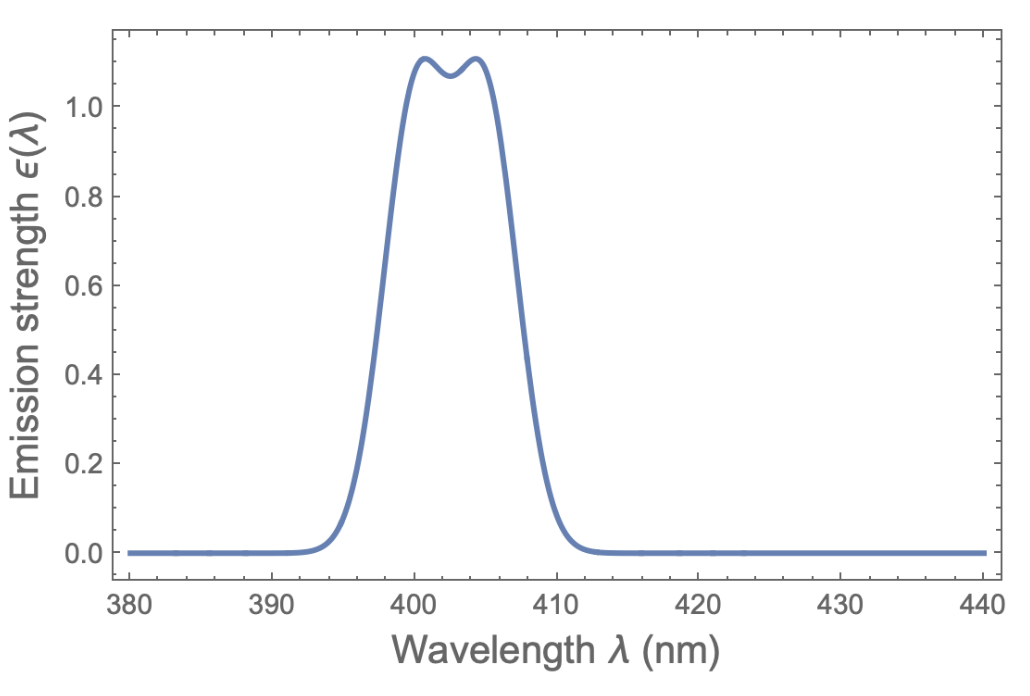

In the plot above, we see superposition of two Gaussians. Since their wavelengths are very close, they overlap and 
create a large bell-shaped curve with a drop in the middle. By looking at this plot, we can't see the _exact_ locations of the two means $\lambda_1$ and $\lambda_2$. 

The formula and plot above were just an example. In the cell below, the data given belongs to a spectrum where we don't know $\lambda_1$ and $\lambda_2$, but we know the spectrum is given by two Gaussians as such

$$ \epsilon(\lambda) = \exp \left[-\frac{1}{10} (\lambda-\lambda_1)^2\right] +\exp \left[-\frac{1}{10} (\lambda-\lambda_2)^2\right].$$

[[450.         0.677767]
 [451.         0.932161]
 [452.         1.08208 ]
 [453.         1.10673 ]
 [454.         1.07689 ]
 [455.         1.07689 ]
 [456.         1.10673 ]
 [457.         1.08208 ]
 [458.         0.932161]
 [459.         0.677767]
 [460.         0.408231]]


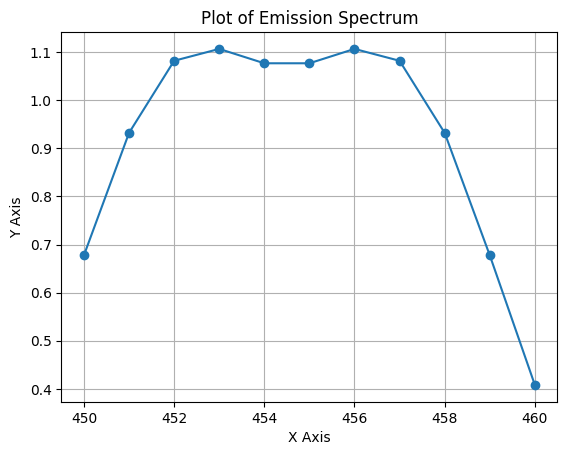

In [9]:
# This is the spectrum data
data = np.array([[450, 0.677767], [451, 0.932161], [452, 1.08208], 
                 [453, 1.10673], [454, 1.07689], [455, 1.07689], [456, 1.10673], 
                 [457,1.08208], [458, 0.932161], [459, 0.677767], [460, 0.408231]])

# suppress scientific form to display numbers in fractional form
np.set_printoptions(suppress=True)

print(data)

# Plotting
x = data[:, 0]
y = data[:, 1]

plt.plot(x, y, marker='o')  # 'o' is for circle markers
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Plot of Emission Spectrum')
plt.grid(True)  
plt.show()

Your task is to do linear regression by using Gaussian base functions to find the two characteristic frequecies $\lambda_1$ and $\lambda_2$ within the spectrum of which data is given in the cell below. 

**Part (a)** 

Define a function `GaussianReg(lambda1,lambda2)`. It takes two arguments, for example, `lambda1=300` and `lambda1=350`, then performs linear regression of the form
$$ y = \beta_0 + \beta_1  \exp \left[-\frac{1}{10} (\lambda-300)^2\right] + \beta_2  \exp \left[-\frac{1}{10} (\lambda-350)^2\right].$$
If for example, `lambda1=350` and `lambda1=400`, then performs linear regression of the form
$$ y = \beta_0 + \beta_1  \exp \left[-\frac{1}{10} (\lambda-350)^2\right] + \beta_2  \exp \left[-\frac{1}{10} (\lambda-400)^2\right].$$


Then this function `
GaussianReg()` returns the $R^2$ value of this linear regression. (Here we're not interested in the $\beta$'s, rather, we're interested in the particular pair $(\lambda_1,\lambda_2)$ that would model the data well, so we use the metric $R^2$ to find these two values.)

In [10]:
# Define your GaussianReg() function here

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def GaussianReg(lambda1,lambda2):
    # do the linear regression for the specific values of lambda1 and lambda2
    # for the data x and y created above.
    t1 = np.exp(-(x - lambda1)**2 / 10)
    t2 = np.exp(-(x - lambda2)**2 / 10)
    
    X = np.column_stack([np.ones(len(x)), t1, t2])
    
    model = LinearRegression()
    model.fit(X, y)
    
    y_pred = model.predict(X)
    R2 = r2_score(y, y_pred)
    
    return R2



**Part (b)** 

- Create two nested for loops for $\lambda_1$ and $\lambda_2$. The for loops will iterate over all integer values of lambda1 and lambda2 in the interval [450,460] by taking a different ($\lambda_1$,$\lambda_2$) set in each iteration. Call the `GaussianReg(lambda1,lambda2)` function in each iteration
- `GaussianReg(lambda1,lambda2)` returns a $R^2$ value; append the three numbers (lambda1, lambda2, R2) to the list `R2values` in each iteration. 
- Convert the R2values list into a numpy array. At the end, R2values will have three columns (lambda1, lambda2, R2) and 100 rows (10  values for $\lambda_1$ times 10 values for $\lambda_1$ = 100).

In [11]:
R2values = []; # create an empty list

for lambda1 in range(450, 460):
    for lambda2 in range(450, 460):
        R2 = GaussianReg(lambda1,lambda2)
        R2values.append([lambda1, lambda2, R2])
    
R2values = np.array(R2values).reshape(100, 3)
print(R2values)
    # Do regression by calling GaussianReg(lambda1,lambda2)
    # append (lambda1, lambda2, R2) to the list R2values 

# R2values is a list; turn it into an array of 100x3.

# print R2values

[[450.         450.           0.00007285]
 [450.         451.           0.42465038]
 [450.         452.           0.48449535]
 [450.         453.           0.56522343]
 [450.         454.           0.66900972]
 [450.         455.           0.76745887]
 [450.         456.           0.69873891]
 [450.         457.           0.14594823]
 [450.         458.           0.1427591 ]
 [450.         459.           0.57015163]
 [451.         450.           0.42465038]
 [451.         451.           0.0290269 ]
 [451.         452.           0.50978829]
 [451.         453.           0.57671492]
 [451.         454.           0.66932525]
 [451.         455.           0.78618393]
 [451.         456.           0.8802016 ]
 [451.         457.           0.6403186 ]
 [451.         458.           0.03806977]
 [451.         459.           0.4750964 ]
 [452.         450.           0.48449535]
 [452.         451.           0.50978829]
 [452.         452.           0.16496511]
 [452.         453.           0.59

**Part (c)** 
 
- Find the best fit by finding the row in `R2values` where $R^2$ is maximum. Print the corresponding $\lambda_1$ and $\lambda_2$ values that maximizes $R^2$.  
- Do these $\lambda_1$ and $\lambda_2$ you found from the linear regression make sense when you look at the plot with the plot label "Plot of Emission Spectrum" above?

In [12]:
max_idx = np.argmax(R2values[:, 2])

best_fit = R2values[max_idx]

lambda1_best = best_fit[0]
lambda2_best = best_fit[1]
R2_max = best_fit[2]

print(f"Best t1: {lambda1_best}")
print(f"Best t2: {lambda2_best}")
print(f"Maximum R^2: {R2_max}")

Best t1: 452.0
Best t2: 457.0
Maximum R^2: 0.9999999999299296


In [13]:
# yes, found t1 and t2 make sense. 
# the plot shows two small peaks at t1=453 and t2=456, with a slight dip in between. 
# this "double-peak" shape is caused by the superposition of the two Gaussian functions. 
# the peaks in the data correspond to the centers of these two Gaussians, so the optimal t1 and t2 are expected to be very near 453 and 456.

## Problem 3 (20 pts)

Use the approach from Problem 2 (I don't mean exactly the same functions you defined, but the approach in general) to solve this problem:

`data2` includes (x,y) pairs of a mixture of two exponential decay functions in the form
$$f(x)=e^{-a x} + e^{-b x} $$

For $a$ and $b$ are integers in the interval [1,10], find the (a,b) pair that makes the model f(x) fit the `data2` the best.

(Make sure you don't mistakenly use the varible `data` variable; it's `data2` here.)



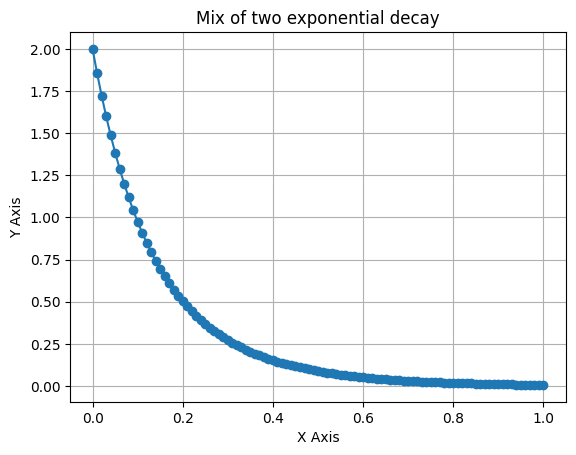

In [14]:
# Run this cell
data2 = np.array([[0., 2.], [0.01, 1.85607], [0.02, 1.72357], [0.03, 1.60153], [0.04, 
  1.48905], [0.05, 1.38533], [0.06, 1.28963], [0.07, 1.20127], [0.08, 
  1.11965], [0.09, 1.0442], [0.1, 0.97441], [0.11, 0.909821], [0.12, 
  0.850006], [0.13, 0.794578], [0.14, 0.743182], [0.15, 
  0.695497], [0.16, 0.651225], [0.17, 0.610098], [0.18, 
  0.571869], [0.19, 0.53631], [0.2, 0.503215], [0.21, 
  0.472394], [0.22, 0.443674], [0.23, 0.416896], [0.24, 
  0.391912], [0.25, 0.36859], [0.26, 0.346805], [0.27, 
  0.326446], [0.28, 0.307407], [0.29, 0.289594], [0.3, 
  0.272917], [0.31, 0.257297], [0.32, 0.242659], [0.33, 
  0.228933], [0.34, 0.216057], [0.35, 0.203971], [0.36, 
  0.192623], [0.37, 0.181961], [0.38, 0.171939], [0.39, 
  0.162516], [0.4, 0.153651], [0.41, 0.145308], [0.42, 
  0.137452], [0.43, 0.130053], [0.44, 0.12308], [0.45, 
  0.116508], [0.46, 0.110311], [0.47, 0.104464], [0.48, 
  0.0989477], [0.49, 0.0937402], [0.5, 0.0888229], [0.51, 
  0.0841784], [0.52, 0.0797901], [0.53, 0.0756428], [0.54, 
  0.0717221], [0.55, 0.0680146], [0.56, 0.0645079], [0.57, 
  0.0611903], [0.58, 0.0580508], [0.59, 0.0550792], [0.6, 
  0.0522658], [0.61, 0.0496018], [0.62, 0.0470786], [0.63, 
  0.0446884], [0.64, 0.0424238], [0.65, 0.0402776], [0.66, 
  0.0382435], [0.67, 0.0363153], [0.68, 0.034487], [0.69, 
  0.0327534], [0.7, 0.0311093], [0.71, 0.0295497], [0.72, 
  0.0280703], [0.73, 0.0266667], [0.74, 0.0253348], [0.75, 
  0.0240708], [0.76, 0.0228712], [0.77, 0.0217326], [0.78, 
  0.0206516], [0.79, 0.0196254], [0.8, 0.0186511], [0.81, 
  0.0177259], [0.82, 0.0168473], [0.83, 0.0160129], [0.84, 
  0.0152204], [0.85, 0.0144677], [0.86, 0.0137527], [0.87, 
  0.0130734], [0.88, 0.0124281], [0.89, 0.011815], [0.9, 
  0.0112324], [0.91, 0.0106789], [0.92, 0.0101529], [0.93, 
  0.00965303], [0.94, 0.009178], [0.95, 0.00872655], [0.96, 
  0.00829748], [0.97, 0.00788966], [0.98, 0.00750203], [0.99, 
  0.00713358], [1., 0.00678335]])

# Plotting
x = data2[:, 0]
y = data2[:, 1]

plt.plot(x, y, marker='o')  # 'o' is for circle markers
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Mix of two exponential decay')
plt.grid(True)  
plt.show()

In [15]:
# your soluion here

results_list = []

for a in range(1, 11):
    for b in range(1, 11):
            
        e1 = np.exp(-a * x)
        e2 = np.exp(-b * x)
        
        features = np.column_stack([e1, e2])
        
        model = LinearRegression()
        model.fit(features, y)
        
        r2 = model.score(features, y)
        results_list.append([a, b, r2])

results_array = np.array(results_list)

max_idx = np.argmax(results_array[:, 2])

best_fit = results_array[max_idx]

a_best = best_fit[0]
b_best = best_fit[1]
R2_max = best_fit[2]

print(f"Best a: {int(a_best)}")
print(f"Best b: {int(b_best)}")
print(f"Maximum R^2: {R2_max}")

Best a: 5
Best b: 10
Maximum R^2: 0.9999999999978726


## Problem 4 - Housing dataset (20 pts)

- **Part (a)** Load the housing dataset. By using the `statsmodel` library, perform a linear regression of 'SalePrice' on the variable 'GarageArea'. The $R^2$ you will find will be less than 0.4.

- **Part (b)** Add some more variables from 'LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch' and redo the linear regression until the adjusted $R^2$ comes out larger than 0.5. (Here you're not adding all, just choose some until adjusted $R^2$>0.5.)

- **Part (c)** Perform a linear regression of 'SalePrice' on all of these variables at the same time (i.e., use all of them, not some of them) 'LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch'. Calculate adjusted $R^2$.

- **Part (d)** Look at the output table. Remove the variables that has no effect on 'SalePrice', and then redo the linear regression. Note down the variables you removed.

In [16]:
houses = pd.read_csv('./house-prices/train.csv')

print("Number of duplicate records in 'houses':",houses.duplicated().sum()  )

quantitative = [f for f in houses.columns if houses.dtypes[f] != 'object']
qualitative = [f for f in houses.columns if houses.dtypes[f] == 'object']
print("Quantitative columns :","\n",quantitative,"\n\n\n","Qualitative columns :","\n", qualitative)


Number of duplicate records in 'houses': 0
Quantitative columns : 
 ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'] 


 Qualitative columns : 
 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir

In [17]:
# Part (a)
data_a = houses[['SalePrice', 'GarageArea']].dropna()
X_a = sm.add_constant(data_a['GarageArea'])
y_a = data_a['SalePrice']

model_a = sm.OLS(y_a, X_a).fit()
print(f"R^2: {model_a.rsquared}")

R^2: 0.3886667590318189


In [18]:
# Part (b)

base_vars = ['GarageArea']
candidate_vars = ['LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtUnfSF', 
                  'TotalBsmtSF', '1stFlrSF', 'WoodDeckSF', 'OpenPorchSF', 
                  'EnclosedPorch', '3SsnPorch']

for var in candidate_vars:
    test_vars = base_vars + [var]
    data_b = houses[['SalePrice'] + test_vars].dropna()
    X_b = sm.add_constant(data_b[test_vars])
    y_b = data_b['SalePrice']
    
    model_b = sm.OLS(y_b, X_b).fit()
    print(f"Variables: {test_vars}")
    print(f"Adjusted R^2: {model_b.rsquared_adj}")
    print("\n")
    
    if model_b.rsquared_adj > 0.5:
        final_vars_b = test_vars
        final_model_b = model_b
        print(f"Adjusted R^2 > 0.5 with variables: {test_vars}")
        break
    else:
        base_vars.append(var)

Variables: ['GarageArea', 'LotArea']
Adjusted R^2: 0.4115452104434846


Variables: ['GarageArea', 'LotArea', 'YearBuilt']
Adjusted R^2: 0.48382582046569067


Variables: ['GarageArea', 'LotArea', 'YearBuilt', 'YearRemodAdd']
Adjusted R^2: 0.5223182643061212


Adjusted R^2 > 0.5 with variables: ['GarageArea', 'LotArea', 'YearBuilt', 'YearRemodAdd']


In [19]:
# part c

all_vars = ['LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtUnfSF', 
            'TotalBsmtSF', '1stFlrSF', 'GarageArea', 'WoodDeckSF', 
            'OpenPorchSF', 'EnclosedPorch', '3SsnPorch']

data_c = houses[['SalePrice'] + all_vars].dropna()
X_c = sm.add_constant(data_c[all_vars])
y_c = data_c['SalePrice']

model_c = sm.OLS(y_c, X_c).fit()
print(f"\nAdjusted R-squared: {model_c.rsquared_adj}")


Adjusted R-squared: 0.6261163246538942


In [20]:
# part d

pvalues = model_c.pvalues[1:]
print("\nP-values for each variable:")
print(pvalues.sort_values())

significant_vars = pvalues[pvalues < 0.05].index.tolist()
removed_vars = [v for v in all_vars if v not in significant_vars]

print(f"\nRemoved variables: {removed_vars}")

data_d = houses[['SalePrice'] + significant_vars].dropna()
X_d = sm.add_constant(data_d[significant_vars])
y_d = data_d['SalePrice']

model_d = sm.OLS(y_d, X_d).fit()
print(f"Adjusted R-squared: {model_d.rsquared_adj}")


P-values for each variable:
GarageArea       3.397204e-33
YearRemodAdd     4.004023e-23
1stFlrSF         1.514321e-13
YearBuilt        6.517708e-10
OpenPorchSF      2.338857e-08
WoodDeckSF       4.947061e-08
LotArea          4.581553e-07
TotalBsmtSF      2.119573e-06
EnclosedPorch    5.488595e-03
BsmtUnfSF        7.576568e-02
3SsnPorch        5.941881e-01
dtype: float64

Removed variables: ['BsmtUnfSF', '3SsnPorch']
Adjusted R-squared: 0.6257455129440884


## Problem 5 - More Housing data (20 pts)

- **Part (a)** Create a new dataframe `houses2` with the columns 'LotArea', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch' and 'SalePrice' from the `houses` dataframe.
- **Part (b)** Check the correlation matrix with `houses2.corr()` and identify the pair that has the maximum correlation; let's call these featureA and featureB.
- **Part (c)** A linear regression model may suffer from collinearity. Perform linear regression for SalePrice by using all features except featureA. Perform linear regression again by using all features except featureB. In both cases, keep all other variables included in the model.
- **Part (d)** Now you've three models with: (i) All variables, (ii) All varibles except featureA and (iii) All varibles except featureB. Compare the adjusted $R^2$'s and report which one is the best performing model.

In [21]:
# Part (a)

columns_to_keep = ['LotArea', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 
                   '1stFlrSF', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
                   'EnclosedPorch', 'SalePrice']

houses2 = houses[columns_to_keep].copy()
houses2

,LotArea,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,SalePrice
0,8450,2003,2003,856,856,548,0,61,0,208500
1,9600,1976,1976,1262,1262,460,298,0,0,181500
2,11250,2001,2002,920,920,608,0,42,0,223500
3,9550,1915,1970,756,961,642,0,35,272,140000
4,14260,2000,2000,1145,1145,836,192,84,0,250000
...,...,...,...,...,...,...,...,...,...,...
1455,7917,1999,2000,953,953,460,0,40,0,175000
1456,13175,1978,1988,1542,2073,500,349,0,0,210000
1457,9042,1941,2006,1152,1188,252,0,60,0,266500
1458,9717,1950,1996,1078,1078,240,366,0,112,142125


In [22]:
# part b

corr_matrix = houses2.corr()
print(corr_matrix)

                LotArea  YearBuilt  YearRemodAdd  TotalBsmtSF  1stFlrSF  \
LotArea        1.000000   0.014228      0.013788     0.260833  0.299475   
YearBuilt      0.014228   1.000000      0.592855     0.391452  0.281986   
YearRemodAdd   0.013788   0.592855      1.000000     0.291066  0.240379   
TotalBsmtSF    0.260833   0.391452      0.291066     1.000000  0.819530   
1stFlrSF       0.299475   0.281986      0.240379     0.819530  1.000000   
GarageArea     0.180403   0.478954      0.371600     0.486665  0.489782   
WoodDeckSF     0.171698   0.224880      0.205726     0.232019  0.235459   
OpenPorchSF    0.084774   0.188686      0.226298     0.247264  0.211671   
EnclosedPorch -0.018340  -0.387268     -0.193919    -0.095478 -0.065292   
SalePrice      0.263843   0.522897      0.507101     0.613581  0.605852   

               GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  SalePrice  
LotArea          0.180403    0.171698     0.084774      -0.018340   0.263843  
YearBuilt       

In [23]:
# Part (b)

corr_matrix_no_diag = corr_matrix.where(~np.eye(corr_matrix.shape[0], dtype=bool))
corr_matrix_upper = corr_matrix_no_diag.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

max_corr = corr_matrix_upper.max().max()
max_corr_location = corr_matrix_upper.stack().idxmax()
featureA, featureB = max_corr_location

print(f"\nMaximum correlation: {max_corr:.4f}")
print(f"Feature A: {featureA}")
print(f"Feature B: {featureB}")


Maximum correlation: 0.8195
Feature A: TotalBsmtSF
Feature B: 1stFlrSF


In [24]:
# part c

houses2_clean = houses2.dropna()

all_features = [col for col in houses2.columns if col != 'SalePrice']
X_all = sm.add_constant(houses2_clean[all_features])
y_all = houses2_clean['SalePrice']
model_all = sm.OLS(y_all, X_all).fit()

features_no_A = [col for col in all_features if col != featureA]
X_no_A = sm.add_constant(houses2_clean[features_no_A])
y_no_A = houses2_clean['SalePrice']
model_no_A = sm.OLS(y_no_A, X_no_A).fit()

features_no_B = [col for col in all_features if col != featureB]
X_no_B = sm.add_constant(houses2_clean[features_no_B])
y_no_B = houses2_clean['SalePrice']
model_no_B = sm.OLS(y_no_B, X_no_B).fit()

In [25]:
# part d 

print(model_all.rsquared_adj) # best performer?
print(model_no_A.rsquared_adj)
print(model_no_B.rsquared_adj)

0.6257455129440884
0.6209456543667109
0.6113970870781066


## Problem 6 - Even More Housing Data (20 pts)

- **Part (a)** Perform two linear regressions, first as **SalePrice** ~ **YearBuilt** and then **SalePrice** ~ **YearBuilt** + **YearBuilt**$^2$ and create residuals plots for both case.
- **Part (b)**  Which model do you prefer? Discuss from the perspective of both adjusted $R^2$ and residual plots.
- **Part (c)**  Make a scatterplot for the data with the axes SalePrice (y-axis) vs YearBuilt (x-axis). On the same plot, plot the model polynomial model (a curve) **SalePrice** ~ **YearBuilt** + **YearBuilt**$^2$ so that you can see how well this curve approximates the data.

Model 1: SalePrice ~ YearBuilt
Adjusted R^2: 0.27292328165206114


Model 2: SalePrice ~ YearBuilt + YearBuilt^2
Adjusted R^2: 0.347528670375573


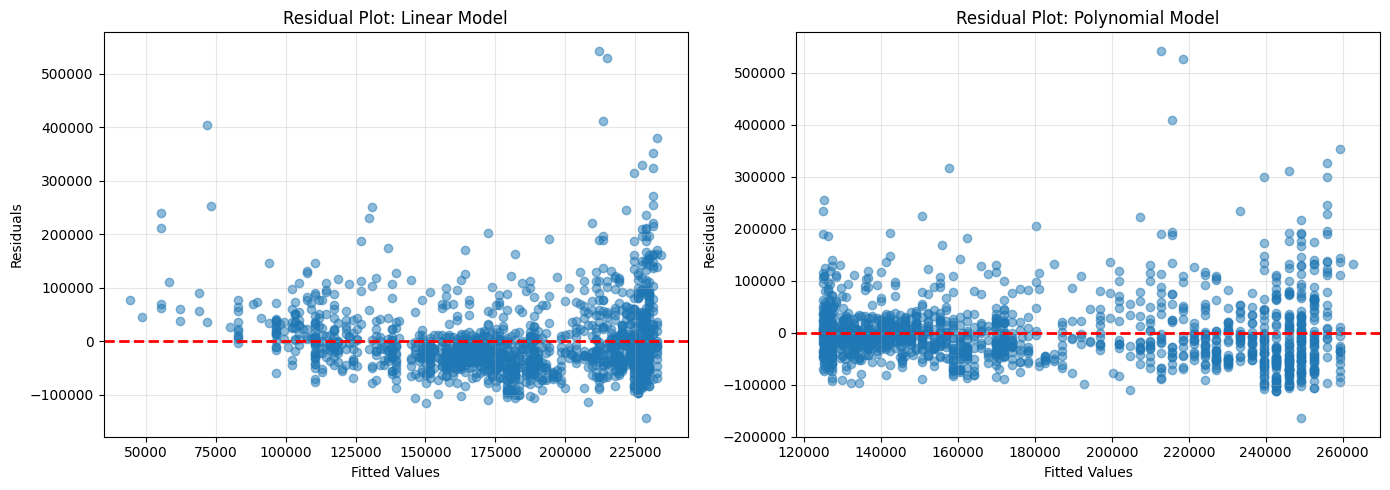

In [26]:
# Part (a)

data_p6 = houses[['SalePrice', 'YearBuilt']].dropna()

X_linear = sm.add_constant(data_p6['YearBuilt'])
y = data_p6['SalePrice']
model_linear = sm.OLS(y, X_linear).fit()

print("Model 1: SalePrice ~ YearBuilt")
print(f"Adjusted R^2: {model_linear.rsquared_adj}")

print("\n")

data_p6['YearBuilt_sq'] = data_p6['YearBuilt'] ** 2
X_poly = sm.add_constant(data_p6[['YearBuilt', 'YearBuilt_sq']])
model_poly = sm.OLS(y, X_poly).fit()

print("Model 2: SalePrice ~ YearBuilt + YearBuilt^2")
print(f"Adjusted R^2: {model_poly.rsquared_adj}")

residuals_linear = model_linear.resid
residuals_poly = model_poly.resid

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].scatter(model_linear.fittedvalues, residuals_linear, alpha=0.5)
axes[0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0].set_xlabel('Fitted Values')
axes[0].set_ylabel('Residuals')
axes[0].set_title('Residual Plot: Linear Model')
axes[0].grid(True, alpha=0.3)

axes[1].scatter(model_poly.fittedvalues, residuals_poly, alpha=0.5)
axes[1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1].set_xlabel('Fitted Values')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residual Plot: Polynomial Model')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [27]:
# Part (b)

print(f"\nLinear Model (SalePrice ~ YearBuilt):")
print(f"  Adjusted R^2: {model_linear.rsquared_adj}")

print(f"\nPolynomial Model (SalePrice ~ YearBuilt + YearBuilt^2):")
print(f"  Adjusted R^2: {model_poly.rsquared_adj}")

# The Polynomial model is preferred because:
# 1) Higher Adjusted R^2 explains more variance
# 2) Residual plot shows no repetitive or systematic patterns


Linear Model (SalePrice ~ YearBuilt):
  Adjusted R^2: 0.27292328165206114

Polynomial Model (SalePrice ~ YearBuilt + YearBuilt^2):
  Adjusted R^2: 0.347528670375573


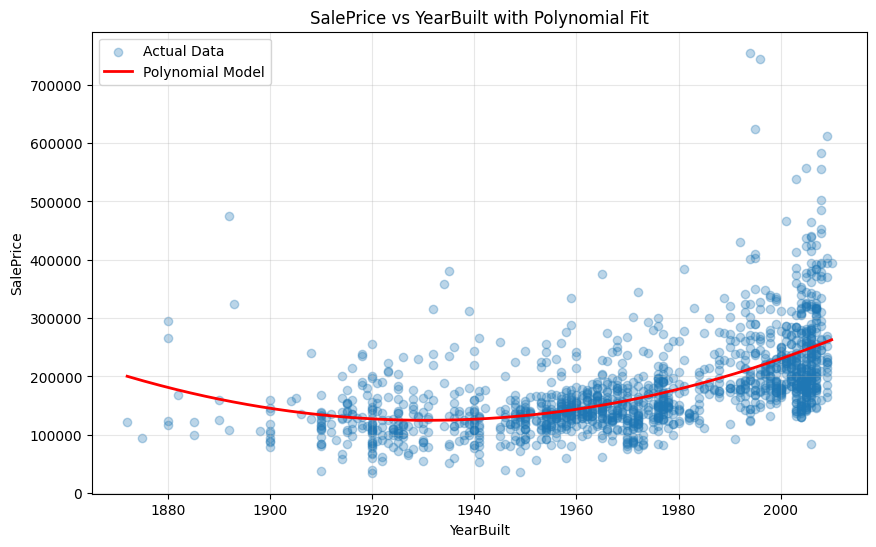

In [28]:
# part c

plt.figure(figsize=(10, 6))
plt.scatter(data_p6['YearBuilt'], data_p6['SalePrice'], alpha=0.3, label='Actual Data')

year_range = np.linspace(data_p6['YearBuilt'].min(), data_p6['YearBuilt'].max(), 300)
year_range_sq = year_range ** 2
X_pred = sm.add_constant(pd.DataFrame({'YearBuilt': year_range, 'YearBuilt_sq': year_range_sq}))
y_pred = model_poly.predict(X_pred)

plt.plot(year_range, y_pred, 'r-', linewidth=2, label='Polynomial Model')
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.title('SalePrice vs YearBuilt with Polynomial Fit')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Problem 7 - Small datasets and $R^2$ (20 pts)

Let's assume `IQ` (target) does not depend on `Shoe Size` (predictor) at all. To simulate this situation, we can create a sample dataset where the two columns have no correlation, i.e., two columns are random numbers.

**Part (a)**
Define a function `fnc(num)` that does the following.
1. It takes the argument 'num' and create 'num' number of random x and y values between [1,100] with np.random.uniform(). For example, if num=100, it will create 100 random numbers for x and also another 100 random numbers for y.
2. It then puts these two uncorrelated x and y values on a dataframe with `df = pd.DataFrame(np.column_stack((x_values, y_values)), columns=['Shoe Size','IQ'])`
3. Then it runs a linear regression by using the `statsmodels` package, and finally returns the $R^2$ value of the model with the last line `return model.rsquared`

Define this function and try `fnc(100)`; you should be getting a very small $R^2$ value because we're creating a linear regression model on a completely random data without any trend between `Shoe Size` and `IQ`. Also try fnc(2); this time you should be getting $R^2=1$ or very close to 1.


In [29]:
def fnc(num):
    x_values = np.random.uniform(1, 100, num)
    y_values = np.random.uniform(1, 100, num)
    
    df = pd.DataFrame(np.column_stack((x_values, y_values)), columns=['Shoe Size', 'IQ'])
    
    X = sm.add_constant(df['Shoe Size'])
    y = df['IQ']
    
    model = sm.OLS(y, X).fit()
    
    return model.rsquared

print(fnc(100))
print(fnc(2))


0.024286976788746473
1.0


**Part (b)**
- Create an empty list `R2values = []`
- Create a for loop where the fnc(num) will be called for num=2,3,..,100: `for num in range(2,101):`
- In each iteration, append the calculated pairs (num,fnc(num)) into `R2values`.
- Convert the list `R2values` into numpy array.
- Plot num (x-axis) vs R2values (y-axis). You should be getting $R^2$=1 for num=2, and it should decrease down to zero (or very small number) as num increases.
- Write a sentence or two as a cautionary piece of advice for your grandchildren regarding the pitfalls of modeling with very small datasets. 

Sample size 2: R^2 = 1.000000
Sample size 3: R^2 = 0.907890
Sample size 4: R^2 = 0.264935
Sample size 5: R^2 = 0.275975
Sample size 6: R^2 = 0.603925
Sample size 7: R^2 = 0.136957
Sample size 8: R^2 = 0.259523
Sample size 9: R^2 = 0.349555
Sample size 10: R^2 = 0.022361
Sample size 11: R^2 = 0.144952
Sample size 12: R^2 = 0.197459
Sample size 13: R^2 = 0.030474
Sample size 14: R^2 = 0.065639
Sample size 15: R^2 = 0.018025
Sample size 16: R^2 = 0.079356
Sample size 17: R^2 = 0.016382
Sample size 18: R^2 = 0.142362
Sample size 19: R^2 = 0.012656
Sample size 20: R^2 = 0.069994
Sample size 21: R^2 = 0.046106
Sample size 22: R^2 = 0.011783
Sample size 23: R^2 = 0.102609
Sample size 24: R^2 = 0.039359
Sample size 25: R^2 = 0.076186
Sample size 26: R^2 = 0.079562
Sample size 27: R^2 = 0.010043
Sample size 28: R^2 = 0.059089
Sample size 29: R^2 = 0.114511
Sample size 30: R^2 = 0.000225
Sample size 31: R^2 = 0.020133
Sample size 32: R^2 = 0.156799
Sample size 33: R^2 = 0.000820
Sample size 34: 

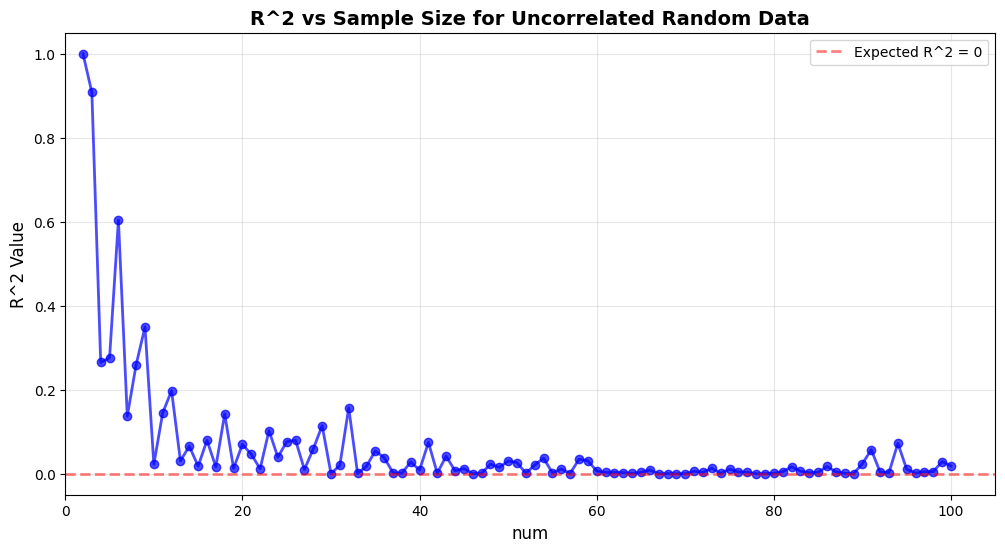

In [30]:
R2values = []

for num in range(2, 101):
    r2 = fnc(num)
    R2values.append((num, r2))
    print(f"Sample size {num}: R^2 = {r2:.6f}")

R2values = np.array(R2values)

plt.figure(figsize=(12, 6))
plt.plot(R2values[:, 0], R2values[:, 1], 'bo-', linewidth=2, markersize=6, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2, alpha=0.5, label='Expected R^2 = 0')
plt.xlabel('num', fontsize=12)
plt.ylabel('R^2 Value', fontsize=12)
plt.title('R^2 vs Sample Size for Uncorrelated Random Data', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)
plt.xlim(0, 105)
plt.ylim(-0.05, 1.05)
plt.show()

# Dear Grandchildren,
# Beware of models trained on tiny datasets... with only 2-10 samples, even completely random noise can produce R^2 close to 1, making you think you discovered a meaningful relationship when none exists. 
# This is pure statistical illusion. Always demand sufficient data (at least 20-30 samples)
# -Your Data Enthusiast Grandpa